In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import os
import seaborn as sns

In [241]:
df = pd.read_csv(r'C:\Users\Devin\Documents\cleanednbasalarytable.csv')
print(df)
df.describe()

              Player   Season  Age   Tm    MP   G  TRB  AST  STL  BLK  ...  \
0       LeBron James  2012-13   28  MIA  37.9  76  8.0  7.3  1.7  0.9  ...   
1       Kevin Durant  2012-13   24  OKC  38.5  81  7.9  4.6  1.4  1.3  ...   
2    Carmelo Anthony  2012-13   28  NYK  37.0  67  6.9  2.6  0.8  0.5  ...   
3        Brook Lopez  2012-13   24  BRK  30.4  74  6.9  0.9  0.4  2.1  ...   
4         Tim Duncan  2012-13   36  SAS  30.1  69  9.9  2.7  0.7  2.7  ...   
..               ...      ...  ...  ...   ...  ..  ...  ...  ...  ...  ...   
195     Jayson Tatum  2018-19   20  BOS  31.1  79  6.0  2.1  1.1  0.7  ...   
196       Joe Harris  2018-19   27  BRK  30.2  76  3.8  2.4  0.5  0.2  ...   
197   Draymond Green  2018-19   28  GSW  31.3  66  7.3  6.9  1.4  1.1  ...   
198  Wesley Matthews  2018-19   32  TOT  30.3  69  2.5  2.3  0.8  0.2  ...   
199    Avery Bradley  2018-19   28  TOT  30.2  63  2.8  2.4  0.7  0.3  ...   

      BPM  VORP    Salary  AdjustedSalary  SalaryPerc  Salaryca

,Age,MP,G,TRB,AST,STL,BLK,TOV,PTS,FG%,...,BPM,VORP,Salary,AdjustedSalary,SalaryPerc,Salarycap,FG,FGA,3P%,PF
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,84.000000,200.000000
mean,26.110000,33.643000,75.190000,5.999000,3.984000,1.175500,0.648000,2.253500,17.639000,0.461310,...,2.148000,2.755000,1.112062e+07,1.260710e+07,15.022408,8.307313e+07,6.383500,13.840500,0.313869,2.300000
std,3.577976,3.126825,6.068611,2.631487,2.411893,0.427038,0.564615,0.910236,5.762029,0.047092,...,3.070576,2.229603,7.772322e+06,8.655216e+06,9.642556,1.734187e+07,1.914288,3.869714,0.117582,0.520823
min,19.000000,30.000000,58.000000,2.100000,0.500000,0.400000,0.100000,0.600000,6.600000,0.359000,...,-4.200000,-1.200000,7.888720e+05,9.179000e+05,1.364591,6.726557e+07,2.600000,5.900000,0.000000,1.100000
25%,23.000000,30.600000,72.000000,4.000000,2.075000,0.800000,0.300000,1.600000,13.200000,0.429000,...,-0.100000,1.200000,5.000000e+06,5.692639e+06,6.635481,6.762126e+07,4.900000,10.775000,0.296750,1.900000
50%,26.000000,33.400000,76.500000,5.200000,3.300000,1.100000,0.450000,2.100000,17.050000,0.452000,...,1.600000,2.200000,9.569277e+06,1.123281e+07,13.021339,7.220203e+07,6.200000,13.950000,0.355000,2.300000
75%,29.000000,36.400000,80.000000,7.625000,5.525000,1.500000,0.700000,2.800000,21.475000,0.484500,...,3.925000,3.900000,1.572841e+07,1.779564e+07,22.388337,1.042270e+08,7.625000,16.850000,0.379000,2.600000
max,36.000000,38.700000,82.000000,13.500000,11.200000,2.200000,3.000000,5.700000,36.100000,0.666000,...,11.700000,9.900000,3.566500e+07,3.845421e+07,48.760542,1.081273e+08,10.800000,24.500000,0.500000,3.800000


In [13]:
df.loc[:,'AdjustedSalary'].mean()


12607099.575

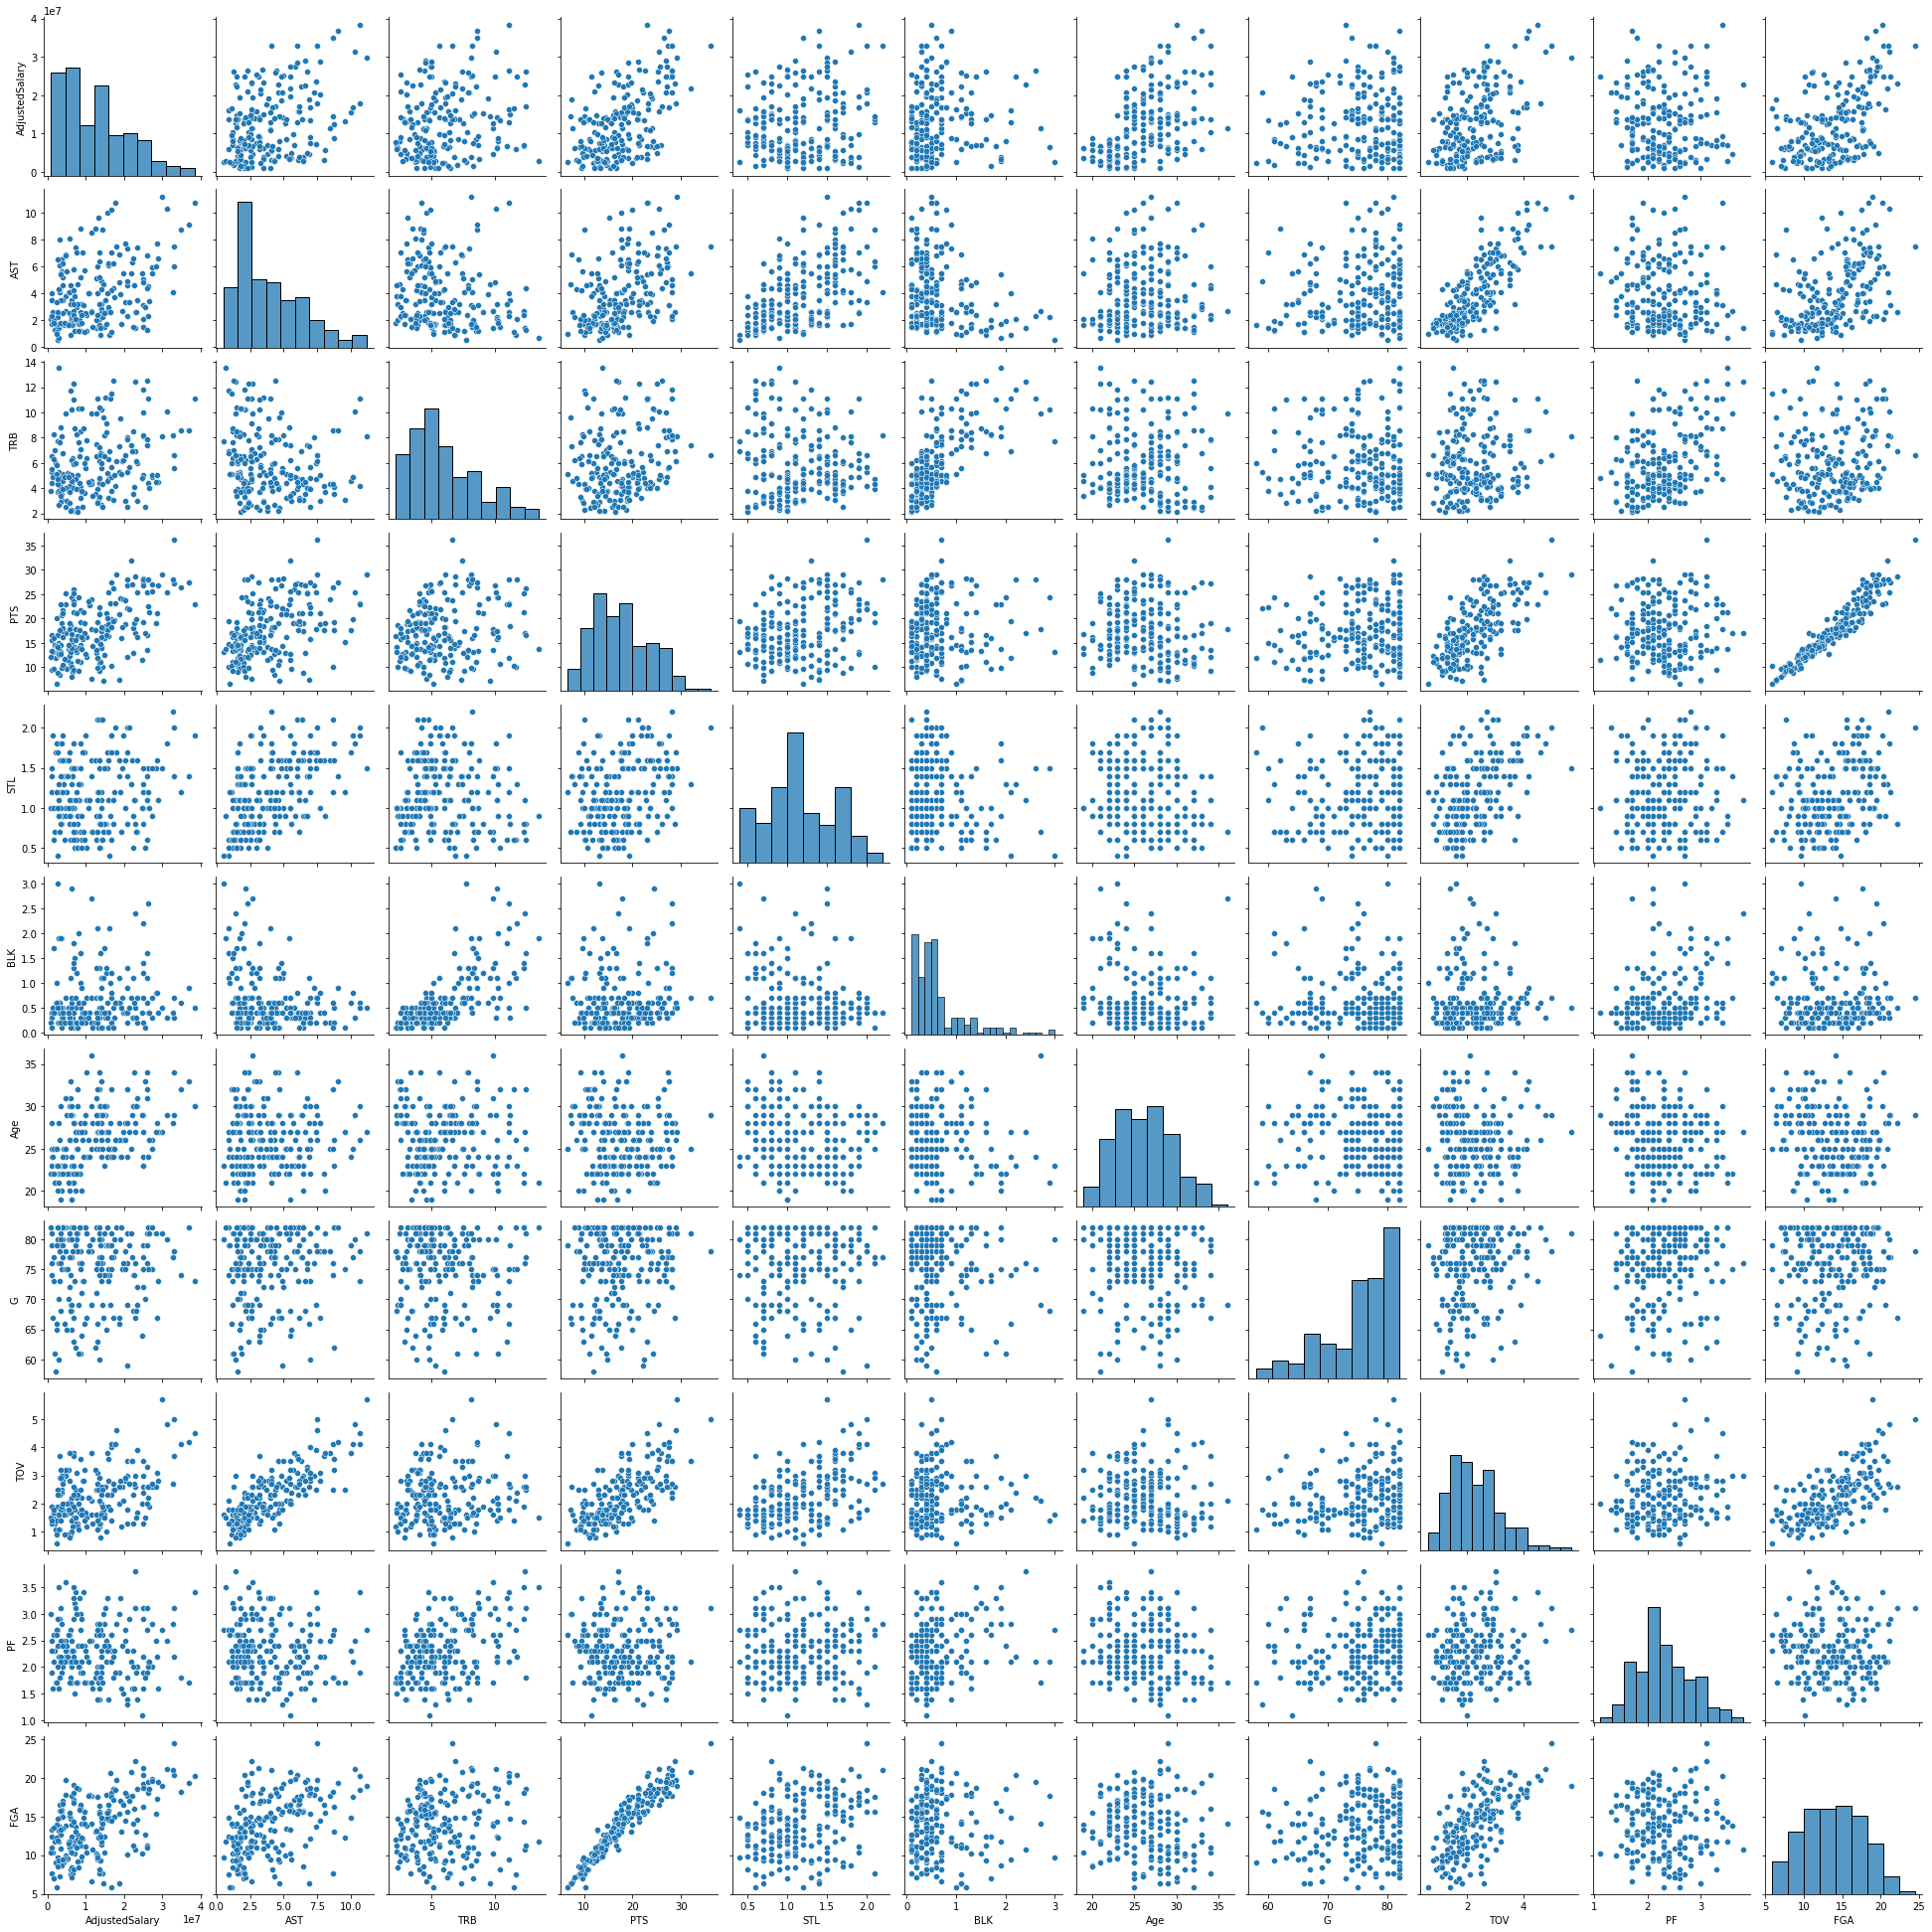

In [259]:
sns.pairplot(df[['AdjustedSalary','AST','TRB','PTS','STL','BLK','Age','G','TOV','PF','FGA']]) 

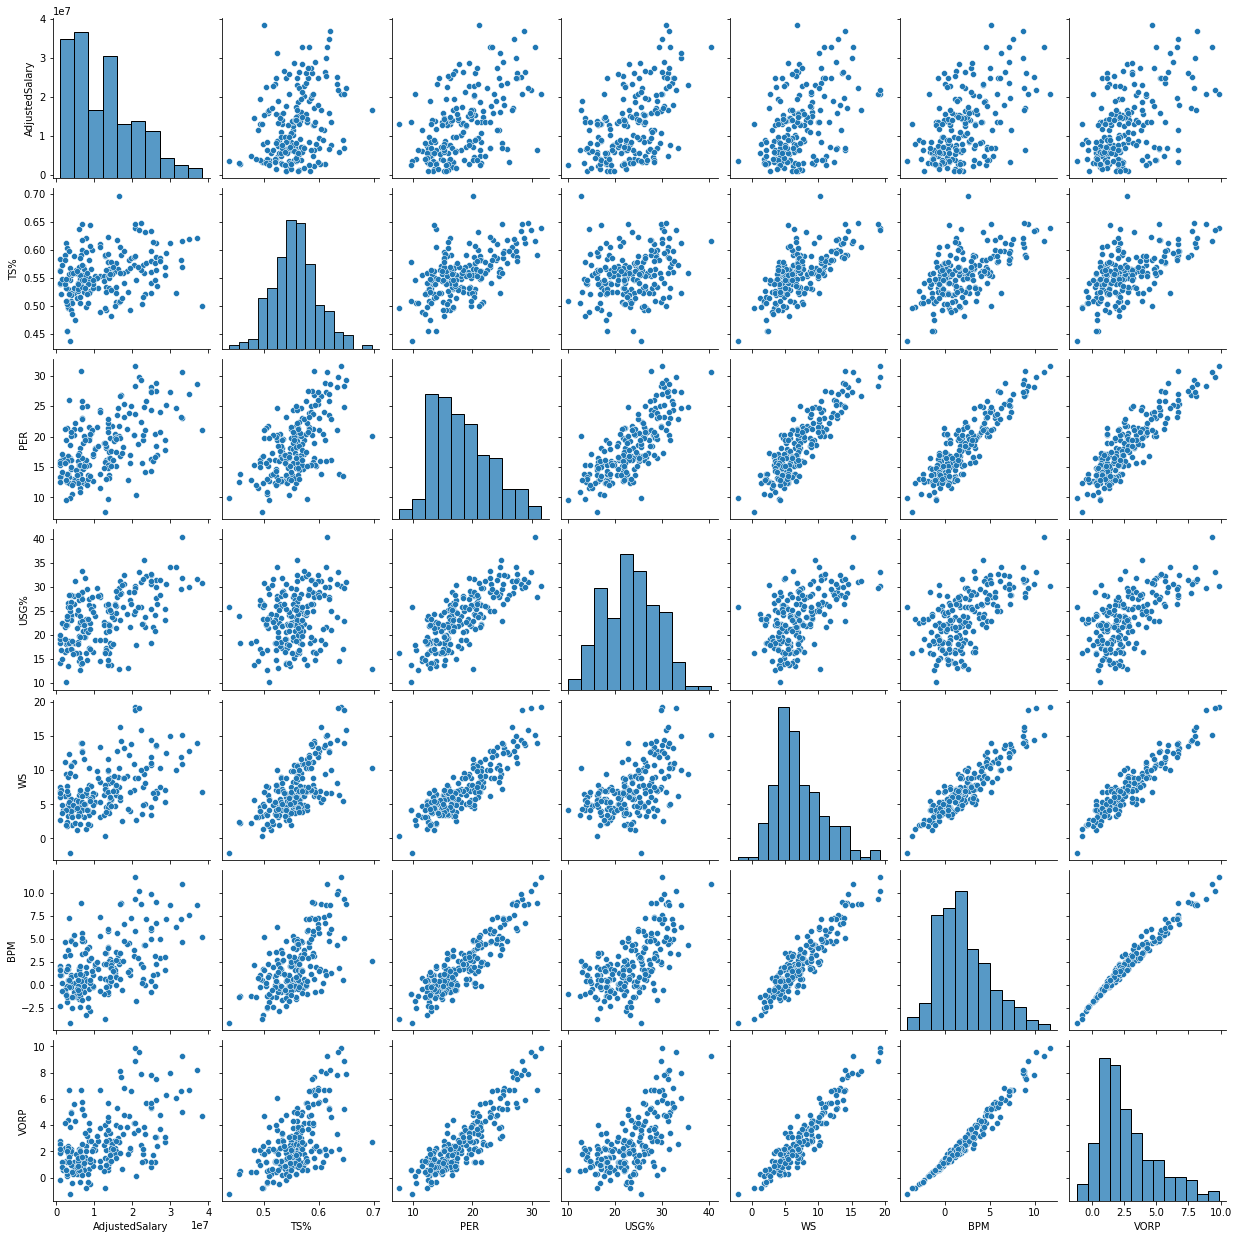

In [255]:
sns.pairplot(df[['AdjustedSalary','TS%','PER','USG%', 'WS','BPM','VORP']]) 
#pairplot for advanced stats done separately for readability sake

<AxesSubplot:>

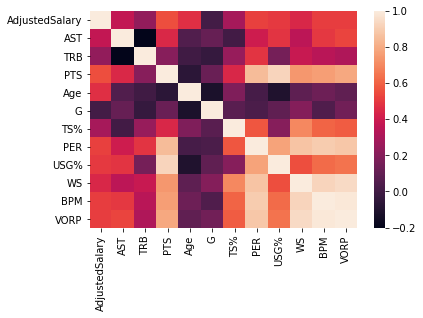

In [242]:
#heatmap
correlation = df[['AdjustedSalary','AST','TRB','PTS','Age','G','TS%','PER','USG%', 'WS','BPM','VORP']].corr()
sns.heatmap(correlation)


In [210]:
#kMeans
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1) #try model with 5 or 6 clusters?
clean_data = df._get_numeric_data().dropna(axis=1)# use only numeric data and remove missing data columns
#kmeans_model.fit(clean_data)#train model using clean data means using 
kmeans_model.fit(df[['AdjustedSalary','TOV', 'AST','TRB','PTS','MP','Age','G','TS%','PER','USG%', 'WS','BPM','VORP']])
labels = kmeans_model.labels_ #get the labels or cluster labels for each player
labels

array([1, 1, 1, 2, 2, 3, 4, 0, 2, 1, 0, 2, 3, 1, 0, 2, 2, 3, 3, 3, 0, 0,
       0, 0, 2, 0, 2, 1, 3, 0, 2, 3, 0, 3, 1, 3, 3, 0, 0, 2, 0, 1, 1, 2,
       1, 2, 1, 2, 2, 3, 0, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 0, 0, 2, 3, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 1, 2, 3, 2, 0, 0, 3, 0, 3, 2,
       2, 2, 2, 0, 3, 0, 3, 1, 0, 2, 0, 3, 0, 3, 0, 3, 3, 1, 1, 2, 3, 1,
       0, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 0, 0, 3, 0, 2, 1,
       4, 4, 0, 3, 1, 1, 2, 2, 1, 1, 3, 2, 1, 0, 2, 3, 2, 2, 3, 2, 2, 3,
       0, 0, 1, 4, 1, 4, 3, 4, 1, 3, 1, 1, 1, 4, 2, 2, 1, 1, 3, 2, 1, 0,
       2, 3, 3, 2, 0, 3, 4, 4, 4, 1, 3, 1, 3, 3, 4, 3, 1, 2, 2, 3, 3, 2,
       1, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

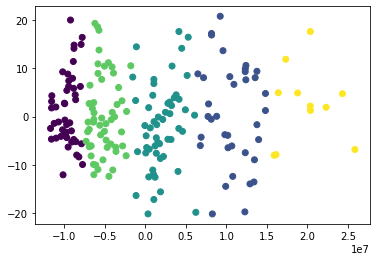

In [211]:
#plot players by cluster, principal component analysis (dimensionality reducing algorithm)to make 2dimesional clusters
from sklearn.decomposition import PCA
pca2 = PCA(2)
plot_columns = pca2.fit_transform(df[['AdjustedSalary','TOV', 'AST','TRB','PTS','MP','Age','G','TS%','PER','USG%', 'WS','BPM','VORP']])
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show


In [238]:
clean_data.head()

,Age,MP,G,TRB,AST,STL,BLK,TOV,PTS,FG%,...,WS,BPM,VORP,Salary,AdjustedSalary,SalaryCap%,Salarycap,FG,FGA,PF
0,28,37.9,76,8.0,7.3,1.7,0.9,3.0,26.8,0.565,...,19.3,11.7,9.9,17545000,20772824,30.719368,67621260,10.1,17.8,1.4
1,24,38.5,81,7.9,4.6,1.4,1.3,3.5,28.1,0.510,...,18.9,9.3,8.9,17548838,20777369,30.726090,67621260,9.0,17.7,1.8
2,28,37.0,67,6.9,2.6,0.8,0.5,2.6,28.7,0.449,...,9.5,4.3,3.9,19450000,23028295,34.054815,67621260,10.0,22.2,3.1
3,24,30.4,74,6.9,0.9,0.4,2.1,1.8,19.4,0.521,...,9.0,3.2,3.0,13668000,16182557,23.931168,67621260,7.7,14.8,2.1
4,36,30.1,69,9.9,2.7,0.7,2.7,2.1,17.8,0.502,...,8.3,5.3,3.8,9638554,11411797,16.876049,67621260,7.1,14.1,1.7


In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['AST','MP','TRB','PTS','Age','WS', 'TOV','TS%','PER','USG%', 'BPM','VORP','PF','FGA']],df[['AdjustedSalary']], test_size=0.20, random_state=1) #Split 20% testing and 80% training. 
#dependent variable is adjusted salary, the rest listed are the independent variables


In [219]:
#Linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)#traingin model
predictions = lr.predict(x_test) #make prediction on testing data
print(predictions)
print(y_test)

[[ 8953095.03487088]
 [ 4182572.51086426]
 [15161534.90249989]
 [ 2641953.89870082]
 [29873992.44658075]
 [13752596.2739715 ]
 [14045371.20232222]
 [24518166.98184476]
 [ 7370120.14883733]
 [12606313.0008934 ]
 [17733123.33551089]
 [ 6158477.78182383]
 [13857156.85953584]
 [17693437.95585517]
 [16739765.06271242]
 [16476829.31661051]
 [21199405.21139343]
 [ 8980480.72533445]
 [19503710.06715325]
 [14973113.27243869]
 [ 9799378.91426987]
 [10127584.7503219 ]
 [23986023.21177434]
 [ 6737224.46289604]
 [ 9155067.82868275]
 [19174752.87311786]
 [ 3168220.26719839]
 [12103719.31829502]
 [15064470.66196842]
 [11138438.27781722]
 [14034723.7179585 ]
 [15019608.93779569]
 [12167012.85156272]
 [  856125.03384   ]
 [ 9704068.82386948]
 [10288209.08401025]
 [14408632.11588954]
 [ 1254407.73936034]
 [ 6846448.78572022]
 [-2521938.8360602 ]]
     AdjustedSalary
58          3152922
40          4143909
34         23386619
102         2905197
184        38454209
198        20874309
95         22518845

In [220]:
#test model: Score returns coeff of determination (r^2 ) of the prediction
lr_confidence = lr.score(x_test, y_test)
print(lr_confidence)

0.5918976720710412
